The Law of Large Number
Sampling
MonteCarlo Sampling

nu = true height of all people living in Canada 
xn = sample mean

In [4]:
# Generate a population of numbers
# 230000

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Collect all parameters that we need

In [7]:
population_size = 2.3e5 #230000

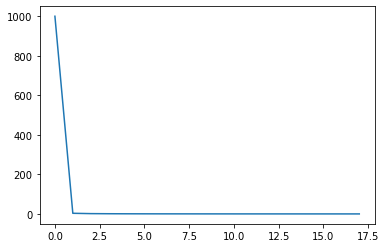

In [9]:
# 1/f

f = np.linspace(0.001,5,18) # if we used 0 going to have divide by zero error
plt.plot(1/f)
plt.show()


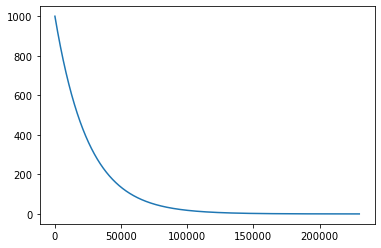

In [22]:
population = 1 / np.logspace(np.log10(.001),np.log10(10),int(population_size))
plt.plot(population)
plt.show()

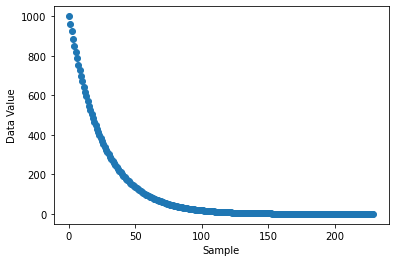

In [25]:
skip = int(1e3)

plt.plot(population[::skip],'o')
plt.xlabel('Sample')
plt.ylabel('Data Value')
plt.show()

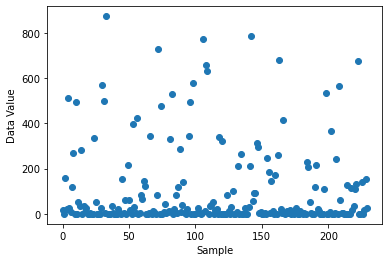

In [26]:
# Shuffle the data

np.random.shuffle(population)

plt.plot(population[::skip], 'o')
plt.xlabel('Sample')
plt.ylabel('Data Value')
plt.show()

In [27]:
# Monre Carlo Sampling 
# We want to randomly select 50 of those 230.000 data points and then compute the average of those 
# 50 sample points

In [28]:
# go on more simulation parameters

sample_size = 50
number_of_samples = 500

In [37]:
# Training for project

random_choice_mean = np.mean(np.random.choice(population,size= sample_size))
trueMean = np.mean(population)
print(f"True mean: {trueMean}")
print(f"Random choice mean: {random_choice_mean}")

True mean: 108.5644652466943
Random choice mean: 117.49791280090223


In [38]:
# Runnig an experiment, collecting 50 samples, and then we repeat the experiment multiple times.

samplemeans = np.zeros(number_of_samples)

for experiment in range(number_of_samples):
    random_sample = np.random.choice(population, size = sample_size)
    samplemeans[experiment] = np.mean(random_sample)

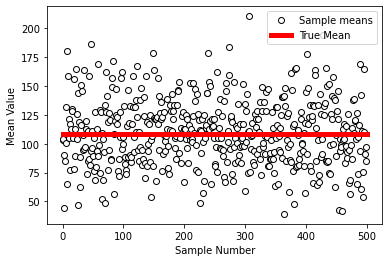

In [45]:
plt.plot(samplemeans, 'ko', markerfacecolor = 'w',label= 'Sample means')

# plt.plot([x0,x1],[y0,y1],'r', linewidth = 5, label= 'True Mean')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r', linewidth = 5, label= 'True Mean')
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

In [46]:
# Next step is, to consider the cumulative average of all of these sample means

In [50]:
# Cumulative Average

cumulative_average_beginning = np.zeros(number_of_samples)
for s in range(number_of_samples):
    cumulative_average_beginning[s] = np.mean(samplemeans[:s+1]) #samplemeans[:i+1] exclusive boundary be a little bit higher

cumulative_average_last = np.cumsum(samplemeans) / np.arange(1, number_of_samples+1)

cumulative_average_beginning-cumulative_average_last


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.84217094e-14,
       -2.84217094e-14, -5.68434189e-14, -4.26325641e-14, -4.26325641e-14,
       -4.26325641e-14, -2.84217094e-14, -2.84217094e-14,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.84217094e-14,
       -1.42108547e-14, -1.42108547e-14, -1.42108547e-14, -1.42108547e-14,
       -1.42108547e-14, -1.42108547e-14, -1.42108547e-14,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [51]:
# Errors come from computer precision errors

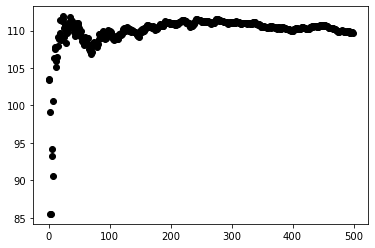

In [52]:
plt.plot(cumulative_average_beginning, 'ko', label= 'Cumulative Average')
plt.show()

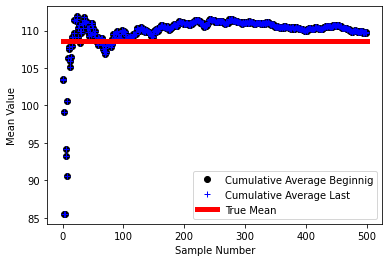

In [53]:
plt.plot(cumulative_average_beginning,'ko',label= 'Cumulative Average Beginnig')
plt.plot(cumulative_average_last, 'b+', label= 'Cumulative Average Last')
plt.plot([0,number_of_samples],[trueMean,trueMean],'r', linewidth = 5, label= 'True Mean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.show()

In [54]:
# Now, compute the divergence between cumulative average and the true mean
# and divergence repeated for 100 of these instances

In [55]:
number_of_meta_samples = 100 # Which means samples of samples

In [56]:
# Repeat this simulation 100 times

In [70]:
cumulative_average_s = np.zeros((number_of_meta_samples, number_of_samples))
allsamplemeans = np.zeros((number_of_meta_samples,number_of_samples))

for meta_experiment in range(number_of_meta_samples):
    for experiment in range(number_of_samples):
        randsample = np.random.choice(population, size=sample_size)
        samplemeans[experiment] = np.mean(randsample)
    
    # Get cumulative average divergences
    tmp = np.cumsum(samplemeans) / np.arange(1, number_of_samples+1)
    cumulative_average_s[meta_experiment,:] = (tmp-trueMean)**2
    
    # Store the samplemeans for center limit theorem
    allsamplemeans[meta_experiment,:] = samplemeans

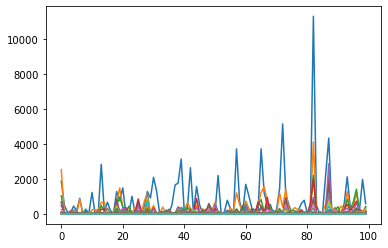

In [71]:
plt.plot(cumulative_average_s)
plt.show()

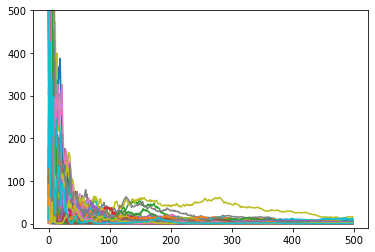

In [72]:
# The graph above should be transposed for our purpose

plt.plot(cumulative_average_s.T)
# Put some limits to graph for higher readability
plt.ylim([-10,500]) # -10 is for just a little bit higher on x axis
plt.show()

In [73]:
# Central Limit Theorem

# This theorem tells us that the shape of black dot and red mean value graph distribution 
#is going to be like a Gaussian distribution


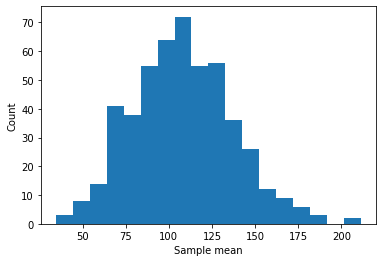

In [74]:
plt.hist(samplemeans, bins='fd') # Freedman-Diaconis == to use this algorithm takes into account the number of data points and the vaiability of the data points
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

In [75]:
 # Above graph is close to the gaussian dist.

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

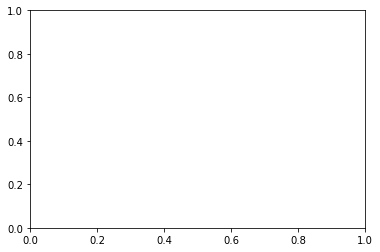

In [77]:
y,x = np.histogram(allsamplemeans[0,:])
plt.plot(x,y)

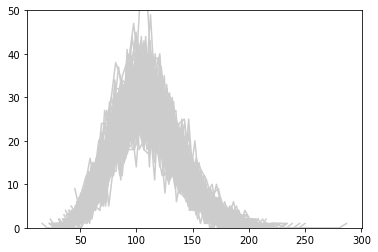

In [88]:
nbin=40

for i in range(number_of_meta_samples):
    y,x = np.histogram(allsamplemeans[i,:],bins=nbin)
    x = (x[1:] + x[:-1]) / 2
#    lower boundary + upper boundary 

    plt.plot(x,y, color=[.8,.8,.8])

plt.ylim(0,50)
plt.show()
